# Data Preprocessing

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("Mouse In Vitro RNA seq_Complete Gene List extract HL004.xlsx")
df.head()

,GeneID,GeneName,Description,Chromosome,Strand,logFC_HL004_vs_Vehicle,PValue_HL004_vs_Vehicle,FDR_HL004_vs_Vehicle
0,ENSMUSG00000018417,Myo1b,myosin IB [Source:MGI Symbol;Acc:MGI:107752],chr1,-,0.846897,1.846119e-36,1.194131e-32
1,ENSMUSG00000037016,Frem2,Fras1 related extracellular matrix protein 2 [...,chr3,-,1.941646,1.125564e-48,2.184157e-44
2,ENSMUSG00000053025,Sv2b,synaptic vesicle glycoprotein 2 b [Source:MGI ...,chr7,-,-0.379560,8.743052e-07,5.110208e-05
3,ENSMUSG00000048978,Nrsn1,neurensin 1 [Source:MGI Symbol;Acc:MGI:894662],chr13,-,0.581307,1.552137e-15,4.987066e-13
4,ENSMUSG00000039706,Ldb2,LIM domain binding 2 [Source:MGI Symbol;Acc:MG...,chr5,-,1.120849,1.520141e-45,1.474917e-41


In [3]:
# Check for missing values in logFC, PValue, FDR columns
num_missing = df[['logFC_HL004_vs_Vehicle', 'PValue_HL004_vs_Vehicle', 'FDR_HL004_vs_Vehicle']].isnull().sum()
print("Number of missing values:", num_missing)

Number of missing values: logFC_HL004_vs_Vehicle     0
PValue_HL004_vs_Vehicle    0
FDR_HL004_vs_Vehicle       0
dtype: int64


In [4]:
# Summary statistics
df[['logFC_HL004_vs_Vehicle', 'PValue_HL004_vs_Vehicle', 'FDR_HL004_vs_Vehicle']].describe()

,logFC_HL004_vs_Vehicle,PValue_HL004_vs_Vehicle,FDR_HL004_vs_Vehicle
count,19405.000000,1.940500e+04,1.940500e+04
mean,0.055923,3.595171e-01,5.335406e-01
std,0.342876,3.138413e-01,3.230819e-01
min,-2.207688,1.125564e-48,2.184157e-44
25%,-0.128645,6.151616e-02,2.460266e-01
50%,0.001548,2.878134e-01,5.754540e-01
75%,0.187311,6.242161e-01,8.322738e-01
max,3.857408,9.999863e-01,9.999863e-01


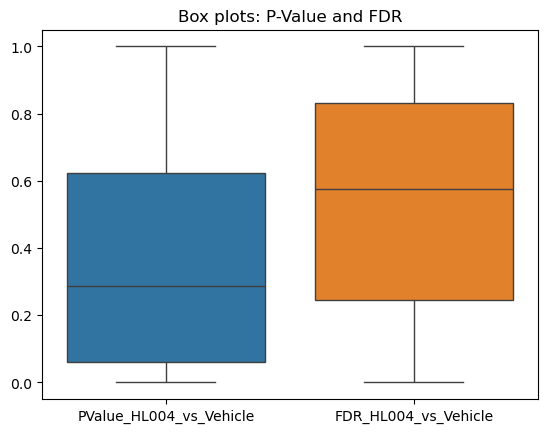

In [5]:
# Box plots of p-value and FDR columns
plt.figure()
plt.title("Box plots: P-Value and FDR")
sns.boxplot(data=df[['PValue_HL004_vs_Vehicle', 'FDR_HL004_vs_Vehicle']])
plt.show()

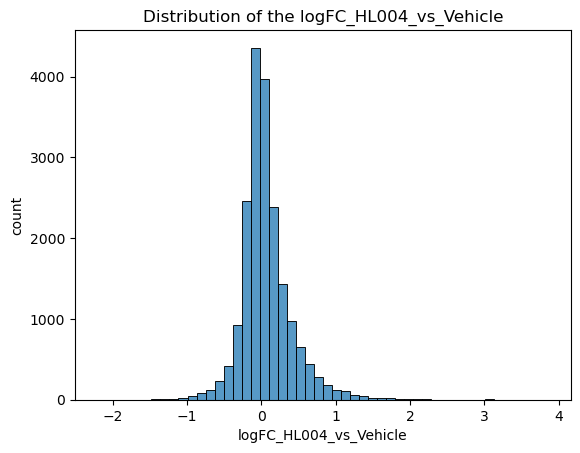

In [6]:
# plot the distribution of the logFC_HL004_vs_Vehicle
# difference between the drug treated vs non-drug treated log value (drug treated - control)
# each count represens a gene ID
plt.figure()
sns.histplot(df['logFC_HL004_vs_Vehicle'], bins=50)
plt.title('Distribution of the logFC_HL004_vs_Vehicle')
plt.xlabel('logFC_HL004_vs_Vehicle')
plt.ylabel('count')
plt.show()

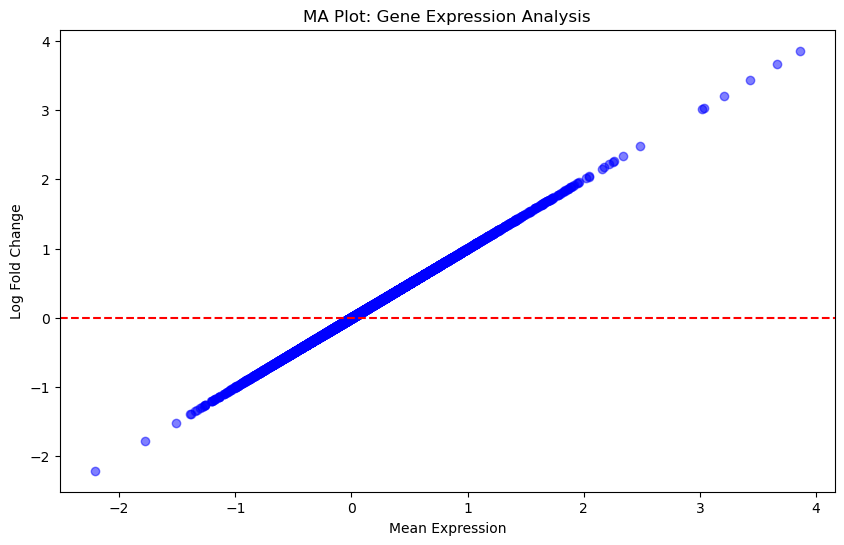

In [7]:
# mean expression plot 
df['mean_expression'] = df[['logFC_HL004_vs_Vehicle']].mean(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_expression'], df['logFC_HL004_vs_Vehicle'], alpha=0.5, c='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Mean Expression')
plt.ylabel('Log Fold Change')
plt.title('MA Plot: Gene Expression Analysis')
plt.show()



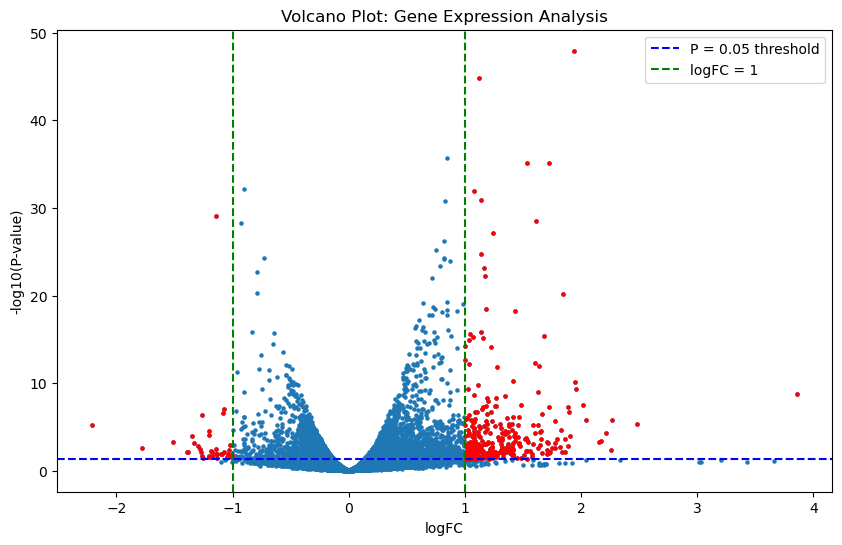

In [8]:
# log vs P value graph
# x axis: biological significant log fold change
# y axis: statistical significance with p-value
plt.figure(figsize=(10, 6))
df['-log10(PValue)'] = -np.log10(df['PValue_HL004_vs_Vehicle'])
plt.scatter(df['logFC_HL004_vs_Vehicle'], df['-log10(PValue)'], s=5)

# significant highlighted in red if logFC > 1 or < -1, and P-value < 0.05
significant = df[(df['logFC_HL004_vs_Vehicle'].abs() > 1) & (df['PValue_HL004_vs_Vehicle'] < 0.05)]
plt.scatter(significant['logFC_HL004_vs_Vehicle'], significant['-log10(PValue)'], color='red', s=5)

plt.axhline(y=-np.log10(0.05), color='blue', linestyle='--', label='P = 0.05 threshold')
plt.axvline(x=1, color='green', linestyle='--', label='logFC = 1')
plt.axvline(x=-1, color='green', linestyle='--')

plt.xlabel('logFC')
plt.ylabel('-log10(P-value)')
plt.title('Volcano Plot: Gene Expression Analysis')
plt.legend()
plt.show()

In [9]:
# Count the number of rows where PValue_HL004_vs_Vehicle > 0.05 or < 0.05
p_value_non_significant_count = df[df['PValue_HL004_vs_Vehicle'] > 0.05].shape[0]
p_value_significant_count = df[df['PValue_HL004_vs_Vehicle'] < 0.05].shape[0]

print(f"Number of genes where PValue_HL004_vs_Vehicle > 0.05: {p_value_non_significant_count}")
print(f"Number of genes where PValue_HL004_vs_Vehicle < 0.05: {p_value_significant_count}")

Number of genes where PValue_HL004_vs_Vehicle > 0.05: 14948
Number of genes where PValue_HL004_vs_Vehicle < 0.05: 4457


In [10]:
# Count the number of rows where FDR_HL004_vs_Vehicle > 0.05 or < 0.05
FDR_non_significant_count = df[df['FDR_HL004_vs_Vehicle'] > 0.05].shape[0]
FDR_significant_count = df[df['FDR_HL004_vs_Vehicle'] < 0.05].shape[0]

print(f"Number of genes where FDR_HL004_vs_Vehicle > 0.05: {FDR_non_significant_count}")
print(f"Number of genes where FDR_HL004_vs_Vehicle < 0.05: {FDR_significant_count}")

Number of genes where FDR_HL004_vs_Vehicle > 0.05: 17315
Number of genes where FDR_HL004_vs_Vehicle < 0.05: 2090


                         logFC_HL004_vs_Vehicle  PValue_HL004_vs_Vehicle  \
logFC_HL004_vs_Vehicle                 1.000000                -0.142989   
PValue_HL004_vs_Vehicle               -0.142989                 1.000000   
FDR_HL004_vs_Vehicle                  -0.169130                 0.954901   

                         FDR_HL004_vs_Vehicle  
logFC_HL004_vs_Vehicle              -0.169130  
PValue_HL004_vs_Vehicle              0.954901  
FDR_HL004_vs_Vehicle                 1.000000  


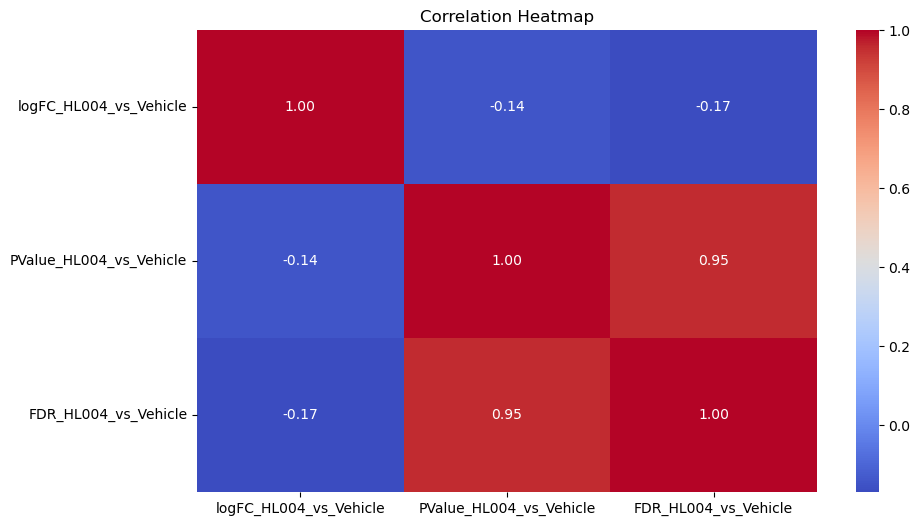

In [12]:
# Analyze the correlation between diff numerical values
correlation_matrix = df[['logFC_HL004_vs_Vehicle', 'PValue_HL004_vs_Vehicle', 'FDR_HL004_vs_Vehicle']].corr()
print(correlation_matrix)

# Visualise the correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()